<a href="https://colab.research.google.com/github/Anubhav2610/Credit-Risk-Analysis/blob/main/credit_risk_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost


In [ ]:
import pandas as pd

# Load the dataset (update filename if needed)
df = pd.read_csv('german_credit_data.csv')

# Quick look at the data
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [ ]:
#Data Exploration
import matplotlib.pyplot as plt
import seaborn as sns

# Basic information
print("Shape of dataset:", df.shape)
print("\nDataset Info:")
df.info()


Shape of dataset: (1000, 10)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:

# Basic statistics
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Summary Statistics:
        Unnamed: 0          Age          Job  Credit amount     Duration
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000
mean    499.500000    35.546000     1.904000    3271.258000    20.903000
std     288.819436    11.375469     0.653614    2822.736876    12.058814
min       0.000000    19.000000     0.000000     250.000000     4.000000
25%     249.750000    27.000000     2.000000    1365.500000    12.000000
50%     499.500000    33.000000     2.000000    2319.500000    18.000000
75%     749.250000    42.000000     2.000000    3972.250000    24.000000
max     999.000000    75.000000     3.000000   18424.000000    72.000000

Missing Values:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


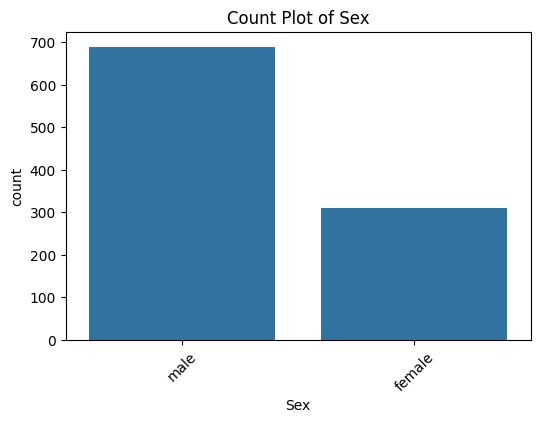

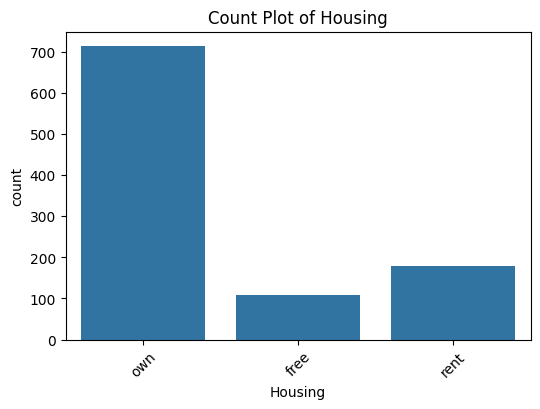

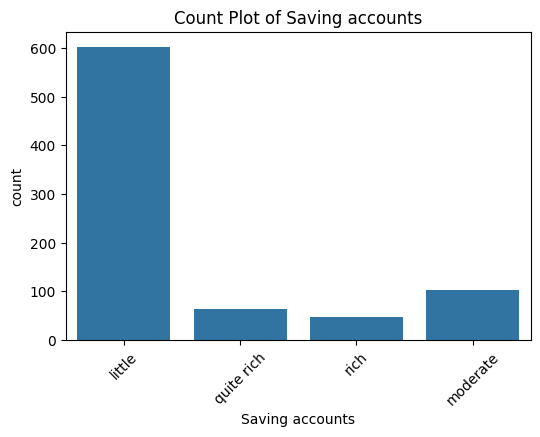

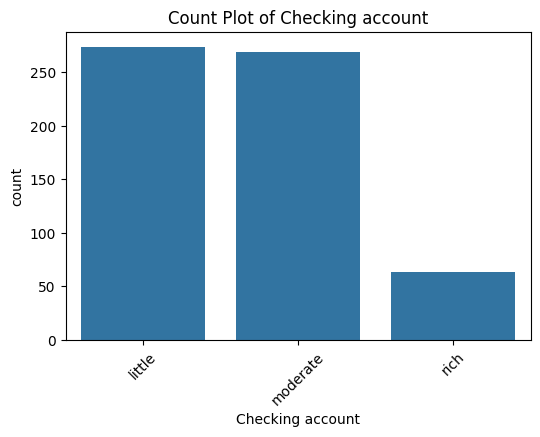

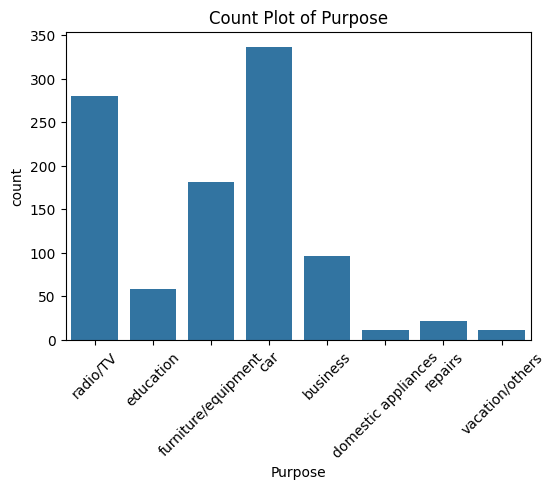

In [ ]:

# Countplot for categorical columns (up to 5 as example)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols[:5]:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()



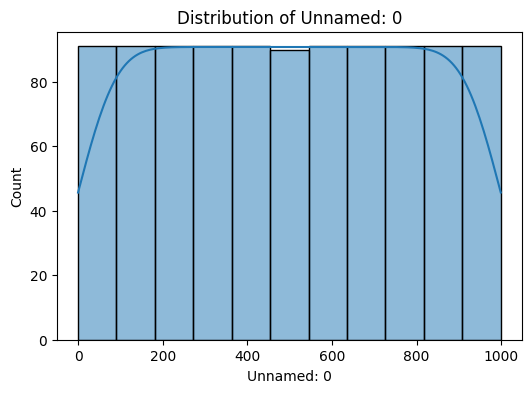

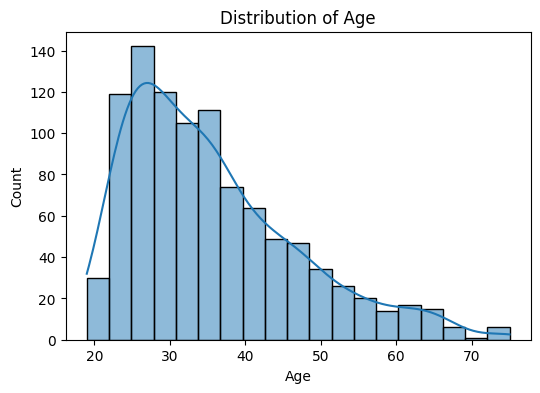

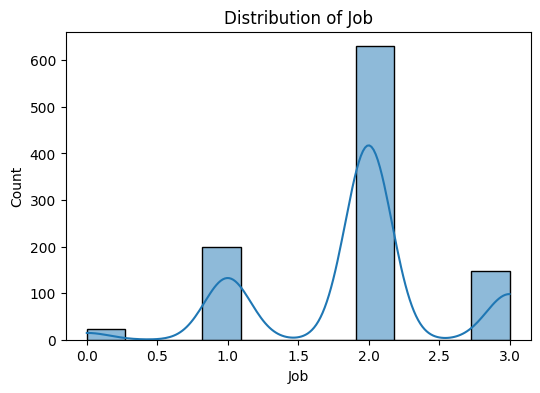

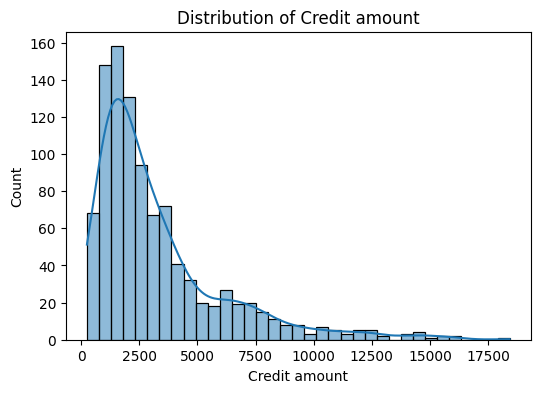

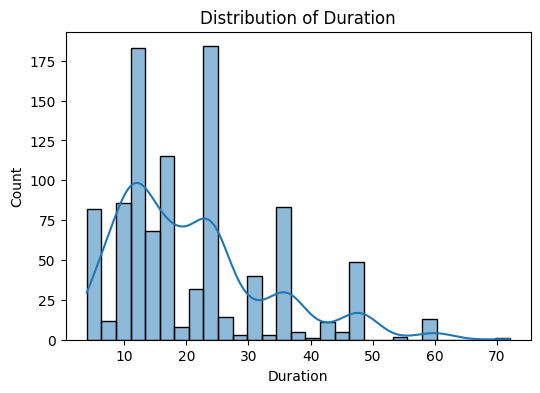

In [ ]:

# Distribution of numerical features
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()




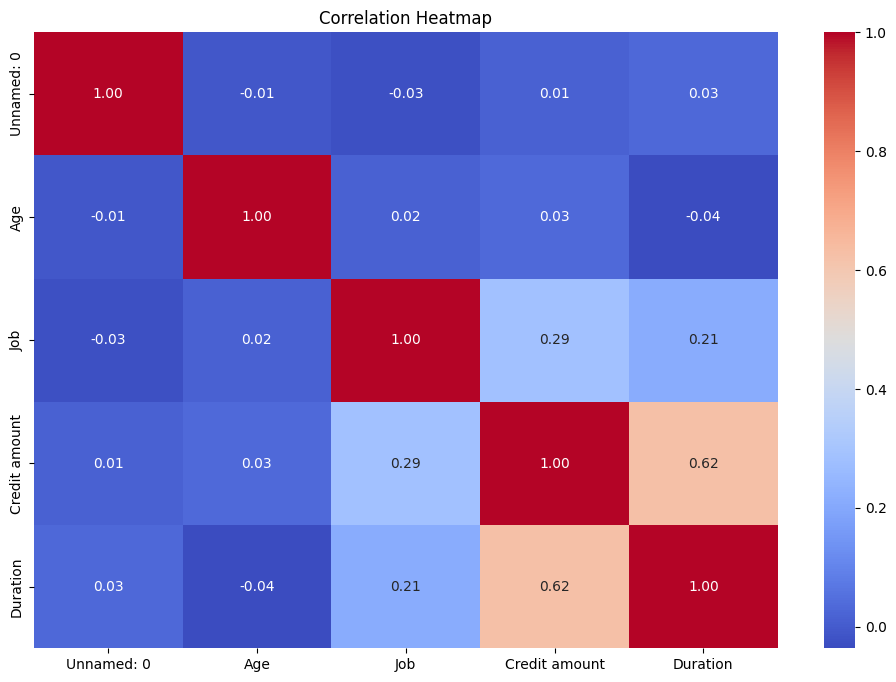

In [ ]:
# Correlation heatmap (only numeric columns)
import numpy as np

plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Check missing values
print("Missing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [ ]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_info')
df['Checking account'] = df['Checking account'].fillna('no_info')

# Encode categorical variables using Label Encoding
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoders for later decoding if needed

# Verify cleaning
print("\nMissing values after cleaning:\n", df.isnull().sum())
print("\nData types after encoding:\n", df.dtypes)




Missing values after cleaning:
 Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

Data types after encoding:
 Age                 int64
Sex                 int64
Job                 int64
Housing             int64
Saving accounts     int64
Checking account    int64
Credit amount       int64
Duration            int64
Purpose             int64
dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# --- Step 1: Encode Categorical Features ---
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Save encoder for inverse transform if needed

# --- Step 2: Scale Numerical Features ---
numerical_cols = ['Age', 'Job', 'Credit amount', 'Duration']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Preview the result
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,2.766456,1,0.146949,1,2,0,-0.745131,-1.236478,5
1,-1.191404,0,0.146949,1,0,1,0.949817,2.248194,5
2,1.183312,1,-1.383771,1,0,2,-0.416562,-0.738668,3
3,0.831502,1,0.146949,0,0,0,1.634247,1.750384,4
4,1.535122,1,0.146949,0,0,0,0.566664,0.256953,1


In [ ]:
from sklearn.model_selection import train_test_split

# Create a target column: Credit risk -> 1 if credit amount > median, else 0
df['Credit_risk'] = (df['Credit amount'] > df['Credit amount'].median()).astype(int)

# Define features (X) and target (y)
X = df.drop('Credit_risk', axis=1)
y = df['Credit_risk']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (800, 9)
Test set size: (200, 9)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC()

# Train models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)





SVC()

In [ ]:
# Predictions
log_reg_preds = log_reg.predict(X_test)
rf_preds = rf_clf.predict(X_test)
svm_preds = svm_clf.predict(X_test)

# Evaluation
log_acc = accuracy_score(y_test, log_reg_preds)
rf_acc = accuracy_score(y_test, rf_preds)
svm_acc = accuracy_score(y_test, svm_preds)

print("Model Accuracy Scores:")
print(f"Logistic Regression: {log_acc:.2f}")
print(f"Random Forest: {rf_acc:.2f}")
print(f"SVM: {svm_acc:.2f}")

Model Accuracy Scores:
Logistic Regression: 0.98
Random Forest: 1.00
SVM: 0.94


In [ ]:
#Logistic Regression - Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)

log_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'penalty': ['l2']
}

log_grid = GridSearchCV(log_reg, log_param_grid, cv=5, scoring='accuracy')
log_grid.fit(X_train, y_train)

print("Best Parameters (Logistic Regression):", log_grid.best_params_)
print("Best Accuracy (CV):", log_grid.best_score_)


Best Parameters (Logistic Regression): {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Accuracy (CV): 0.9887499999999999


In [ ]:
#Random Forest - Grid Search
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf, rf_param_grid, cv=5, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best Parameters (Random Forest):", rf_grid.best_params_)
print("Best Accuracy (CV):", rf_grid.best_score_)


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy (CV): 0.9962499999999999


In [ ]:
#SVM - Grid Search
from sklearn.svm import SVC

svm = SVC()

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(svm, svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)

print("Best Parameters (SVM):", svm_grid.best_params_)
print("Best Accuracy (CV):", svm_grid.best_score_)




Best Parameters (SVM): {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy (CV): 0.98125


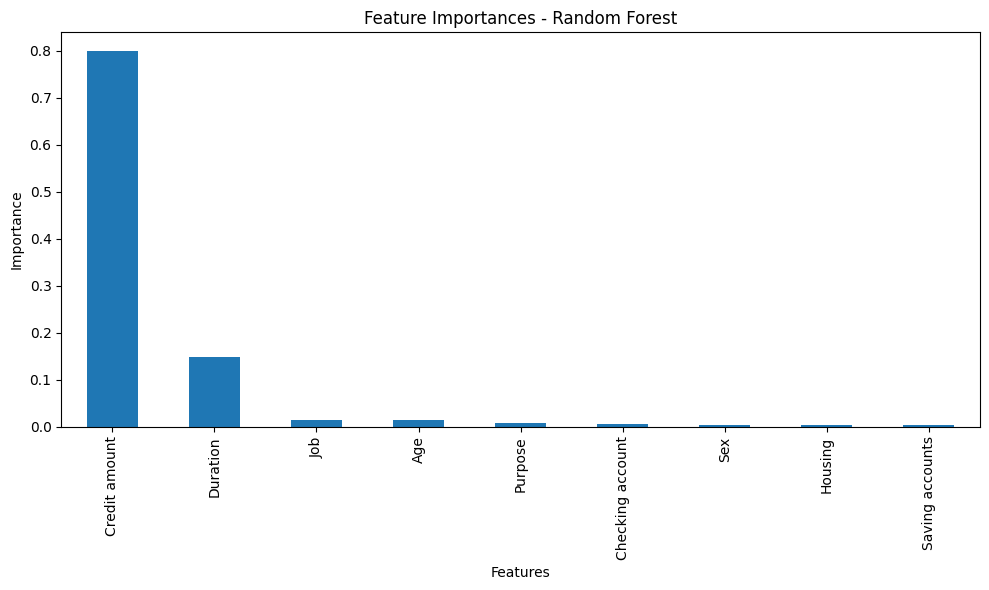

In [ ]:
# Random Forest Feature Importance

# Use the best estimator from GridSearchCV
best_rf = rf_grid.best_estimator_

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization
feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feat_importances.plot(kind='bar')
plt.title("Feature Importances - Random Forest")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()



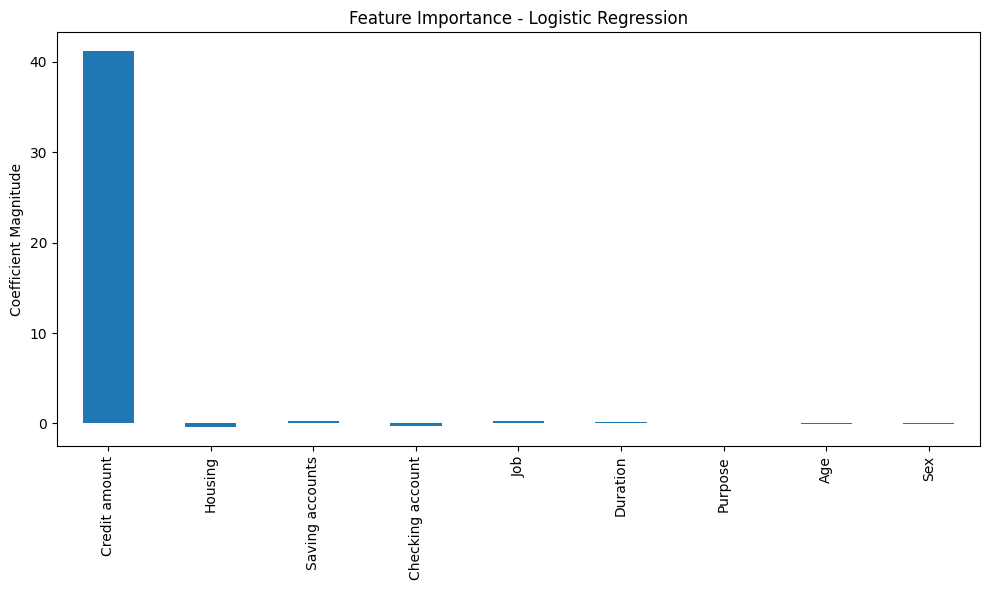

In [ ]:
#Logistic Regression Coefficients
best_log = log_grid.best_estimator_
log_importance = pd.Series(best_log.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
log_importance.plot(kind='bar')
plt.title("Feature Importance - Logistic Regression")
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()


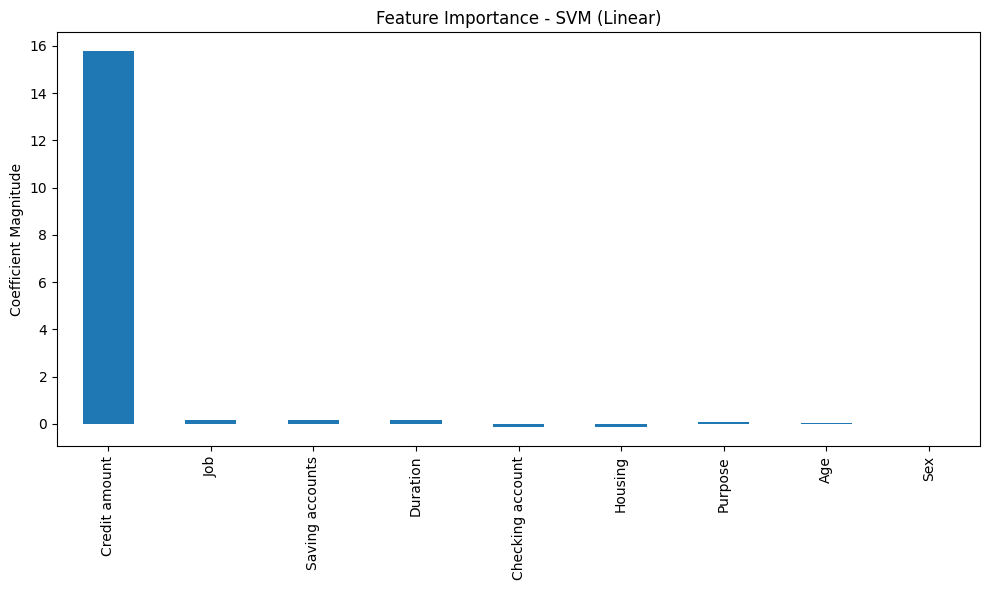

In [ ]:
#SVM (Linear Kernel) Coefficients
best_svm = svm_grid.best_estimator_
svm_importance = pd.Series(best_svm.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
svm_importance.plot(kind='bar')
plt.title("Feature Importance - SVM (Linear)")
plt.ylabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()


In [ ]:
import joblib

# Save the best Random Forest model
joblib.dump(rf_grid.best_estimator_, 'best_random_forest_model.pkl')

print("Model saved as 'best_random_forest_model.pkl'")


Model saved as 'best_random_forest_model.pkl'
